# Class Distribution

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
from functools import cmp_to_key
from matplotlib import colors as mcolors

def drawClassDist(vectors):
    colors = ["red", "green", "blue", "gold", "yellow"] + list(mcolors.TABLEAU_COLORS.values()) 
    p = vectors["ActivityName"]
    v = vectors[["ActivityName"]]
    v["c"] = 1

    labels = p.unique()
    count = v.groupby(['ActivityName']).agg(['count'])[("c", "count")]
    labels, count

    def compare(item1, item2):
        return count[item2] - count[item1]

    print(labels)
    labels = sorted(labels, key=cmp_to_key(compare))
    sizes = [count[l] for l in labels]
    plt.rcParams['figure.figsize'] = [12, 5]
    fig1, ax1 = plt.subplots()
    patches, texts = ax1.pie(sizes, colors=colors)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(patches, labels, loc="right")
    plt.tight_layout()
    plt.show()
    
    feat = vectors.shape[1]
    return (labels, sizes, feat)


In [3]:
classDist = {}

# CASAS

['R2_work_at_computer' 'R1_sleep' 'R2_sleep' 'R1_bed_to_toilet'
 'R2_bed_to_toilet' 'R1_groom' 'R2_groom' 'R1_breakfast' 'R2_breakfast'
 'R1_work_at_computer' 'R2_prepare_dinner' 'R2_prepare_lunch' 'Cleaning'
 'R1_work_at_dining_room_table' 'R2_watch_TV' 'Wash_bathtub']


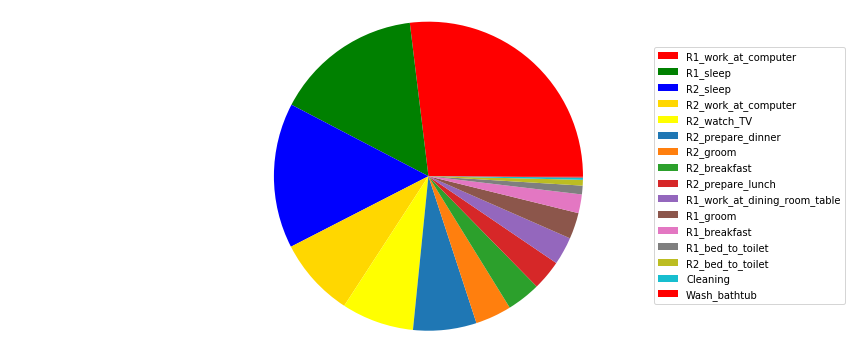

In [4]:
dataDir = '../../Dataset/twor.2009/annotated.feat.ch1'
raw = pd.read_csv(dataDir)
classDist["CASAS"] = drawClassDist(raw)

# HouseA

['A3' 'A1' 'A4' 'A2' 'A0' 'A6' 'A5']


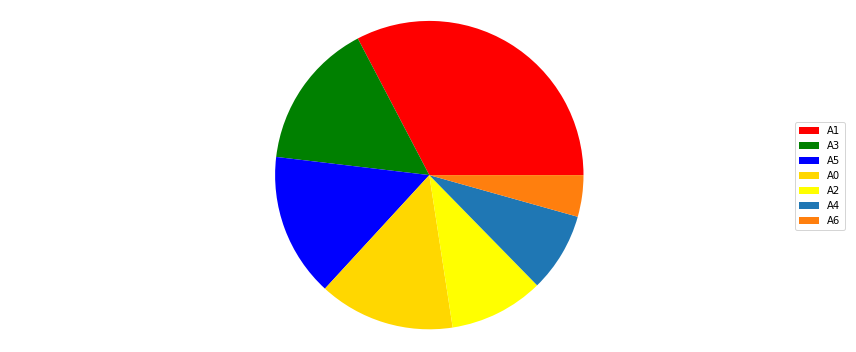

In [5]:
dataDir = '../../Dataset/House/HouseA.feat'
raw = pd.read_csv(dataDir)
classDist["HouseA"] = drawClassDist(raw)

# DSADS

['sitting' 'standing' 'lying on back side' 'lying on right side'
 'ascending stairs' 'descending stairs' 'standing in an elevator still'
 'moving around in an elevator' 'walking in a parking lot'
 'walking on a treadmill1' 'walking on a treadmill2'
 'running on a treadmill3' 'exercising on a stepper'
 'exercising on a cross trainer'
 'cycling on an exercise bike in horizontal positions'
 'cycling on an exercise bike in vertical positions' 'rowing' 'jumping'
 'playing basketball']


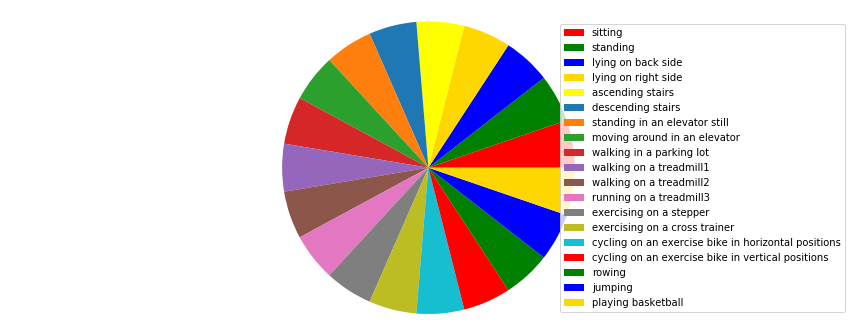

In [6]:
dataDir = '../../Dataset/DSADS/dsads.feat'
raw = pd.read_csv(dataDir)
classDist["DSADS"] = drawClassDist(raw)

# PAMAP2

['lying' 'sitting' 'standing' 'ironing' 'vacuum cleaning'
 'ascending stairs' 'descending stairs' 'walking' 'Nordic walking'
 'cycling' 'running' 'rope jumping']


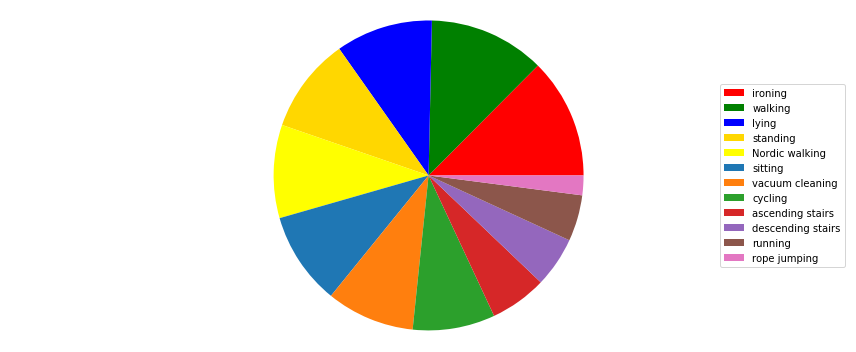

In [9]:
dataDir = '../../Dataset/PAMAP2/pamap.feat'
raw = pd.read_csv(dataDir)
classDist["PAMAP"] = drawClassDist(raw)

# Summary

In [10]:
cols = ["dataset", "class_name", "n_row", "n_feat"]
rows = []
for k in classDist:
    labels, values, feat = classDist[k]
    for i in range(len(labels)):
        rows.append([k, labels[i], values[i], feat])

print(rows)

pd.DataFrame(rows, columns=cols).to_csv("class_distribution.csv", index=False)
# classDist

[['CASAS', 'R1_work_at_computer', 4812, 72], ['CASAS', 'R1_sleep', 2755, 72], ['CASAS', 'R2_sleep', 2716, 72], ['CASAS', 'R2_work_at_computer', 1480, 72], ['CASAS', 'R2_watch_TV', 1354, 72], ['CASAS', 'R2_prepare_dinner', 1184, 72], ['CASAS', 'R2_groom', 677, 72], ['CASAS', 'R2_breakfast', 632, 72], ['CASAS', 'R2_prepare_lunch', 563, 72], ['CASAS', 'R1_work_at_dining_room_table', 521, 72], ['CASAS', 'R1_groom', 489, 72], ['CASAS', 'R1_breakfast', 350, 72], ['CASAS', 'R1_bed_to_toilet', 163, 72], ['CASAS', 'R2_bed_to_toilet', 107, 72], ['CASAS', 'Cleaning', 43, 72], ['CASAS', 'Wash_bathtub', 24, 72], ['HouseA', 'A1', 165, 15], ['HouseA', 'A3', 78, 15], ['HouseA', 'A5', 76, 15], ['HouseA', 'A0', 72, 15], ['HouseA', 'A2', 50, 15], ['HouseA', 'A4', 42, 15], ['HouseA', 'A6', 22, 15], ['DSADS', 'sitting', 480, 406], ['DSADS', 'standing', 480, 406], ['DSADS', 'lying on back side', 480, 406], ['DSADS', 'lying on right side', 480, 406], ['DSADS', 'ascending stairs', 480, 406], ['DSADS', 'descen